In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel

print(os.listdir("/content/drive/MyDrive/Colab Notebooks/datasets/new--mango--thermal-1/"))

#Resize images to
SIZE =416

['train', 'README.roboflow.txt', 'val', 'README.dataset.txt', '.ipynb_checkpoints', 'test']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/datasets/new--mango--thermal-1/train/*"):
    label = os.path.basename(directory_path)  # Get the folder name (label)
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):

        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/datasets/new--mango--thermal-1/test/*"):
    tlabel = os.path.basename(directory_path)  # Get the folder name (label)
    print(tlabel)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional
        test_images.append(img)
        test_labels.append(tlabel)

test_images = np.array(test_images)
test_labels = np.array(test_labels)


Ripened
defective
Raw
Raw
defective
Ripened


In [5]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [6]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
###################################################################

def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file
        #print(image)

        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.

        input_img = x_train[image, :,:,:]
        img = input_img
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc.

         # FEATURE 1 - Pixel values

        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images

        # FEATURE 2 - Bunch of Gabor filter responses

         #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(1):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                #Now filter the image and add values to a new column
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label


        #Append features from current image to the dataset
        image_dataset = pd.concat([image_dataset, df], ignore_index=True)

    return image_dataset

####################################################################

In [8]:
#Extract features from training images
image_features = feature_extractor(x_train)

#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gam

In [9]:
print(n_features)
print(X_for_RF.shape)


3
(225, 1557504)


In [10]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

#Can also use SVM but RF is faster and may be more accurate.
#from sklearn import svm
#SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
#SVM_model.fit(X_for_RF, y_train)


# Fit the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [11]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back.
test_prediction = le.inverse_transform(test_prediction)



Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gam

In [12]:
print(test_prediction)
print(test_for_RF.shape)
print(test_labels)

['Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Ripened' 'Raw' 'Raw' 'Raw' 'Raw'
 'Raw' 'Raw' 'Raw' 'defective' 'defective' 'defective' 'Ripened'
 'defective' 'defective' 'defective' 'defective' 'defective' 'defective'
 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened'
 'Ripened' 'Ripened']
(33, 1557504)
['Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw'
 'Raw' 'Raw' 'defective' 'defective' 'defective' 'defective' 'defective'
 'defective' 'defective' 'defective' 'defective' 'defective' 'Ripened'
 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened'
 'Ripened']


Accuracy =  0.9393939393939394


<Axes: >

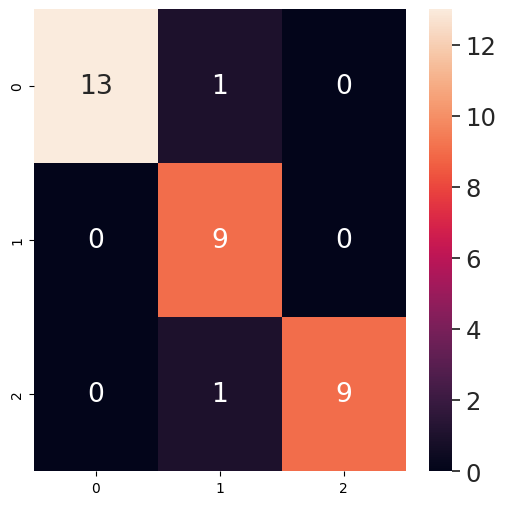

In [13]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

In [13]:
#Can also use SVM but RF is faster and may be more accurate.
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
SVM_model.fit(X_for_RF, y_train)

SVC(decision_function_shape='ovo')

In [14]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = SVM_model.predict(test_for_RF)
#Inverse le transform to get original label back.
test_prediction = le.inverse_transform(test_prediction)


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gam

In [15]:
print(test_prediction)
print(test_for_RF.shape)
print(test_labels)

['Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Ripened' 'Raw' 'Raw' 'Raw' 'Raw'
 'Raw' 'Raw' 'Raw' 'defective' 'defective' 'defective' 'Ripened'
 'defective' 'defective' 'defective' 'defective' 'defective' 'defective'
 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened'
 'Ripened' 'Ripened']
(33, 1557504)
['Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw'
 'Raw' 'Raw' 'defective' 'defective' 'defective' 'defective' 'defective'
 'defective' 'defective' 'defective' 'defective' 'defective' 'Ripened'
 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened'
 'Ripened']


Accuracy =  0.9393939393939394


<Axes: >

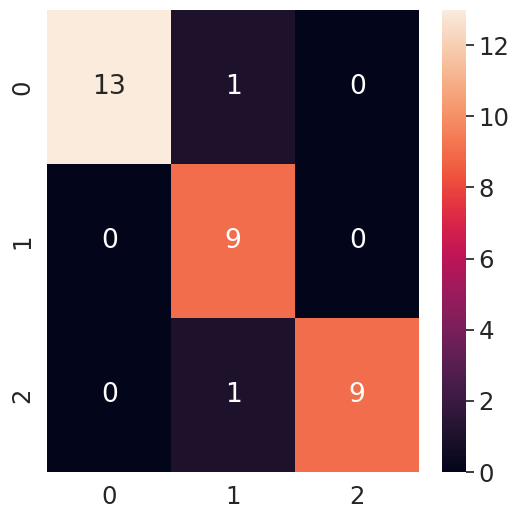

In [16]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

In [17]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes model
NB_model = MultinomialNB()

# Train the model
NB_model.fit(X_for_RF, y_train)


MultinomialNB()

In [18]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = NB_model.predict(test_for_RF)
#Inverse le transform to get original label back.
test_prediction = le.inverse_transform(test_prediction)


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gam

In [19]:
print(test_prediction)
print(test_for_RF.shape)
print(test_labels)

['Ripened' 'Raw' 'Raw' 'Raw' 'Ripened' 'Raw' 'Ripened' 'Ripened' 'Raw'
 'Raw' 'Ripened' 'Raw' 'Ripened' 'Raw' 'defective' 'defective' 'defective'
 'Ripened' 'Ripened' 'defective' 'defective' 'defective' 'Ripened'
 'defective' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened'
 'Ripened' 'Ripened' 'Ripened']
(33, 1557504)
['Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw'
 'Raw' 'Raw' 'defective' 'defective' 'defective' 'defective' 'defective'
 'defective' 'defective' 'defective' 'defective' 'defective' 'Ripened'
 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened'
 'Ripened']


Accuracy =  0.7272727272727273


<Axes: >

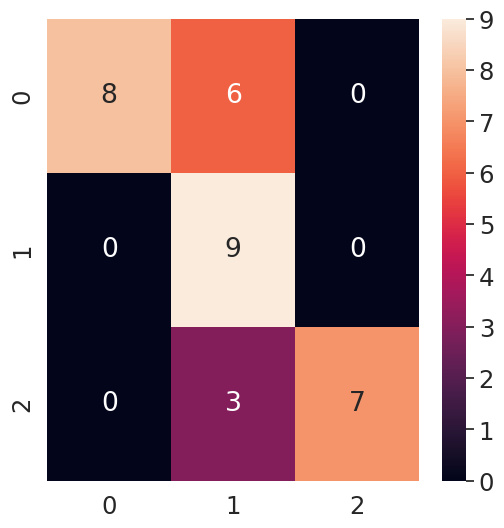

In [20]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model with a Gaussian-like effect using 'weights'
KNN_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the model
KNN_model.fit(X_for_RF, y_train)


KNeighborsClassifier(weights='distance')

In [23]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = KNN_model.predict(test_for_RF)
#Inverse le transform to get original label back.
test_prediction = le.inverse_transform(test_prediction)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gam

In [24]:
print(test_prediction)
print(test_for_RF.shape)
print(test_labels)

['Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Ripened'
 'Raw' 'Raw' 'Raw' 'defective' 'defective' 'defective' 'Ripened'
 'defective' 'defective' 'defective' 'defective' 'Ripened' 'defective'
 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened'
 'Ripened' 'Ripened']
(33, 1557504)
['Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw' 'Raw'
 'Raw' 'Raw' 'defective' 'defective' 'defective' 'defective' 'defective'
 'defective' 'defective' 'defective' 'defective' 'defective' 'Ripened'
 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened' 'Ripened'
 'Ripened']


Accuracy =  0.9090909090909091


<Axes: >

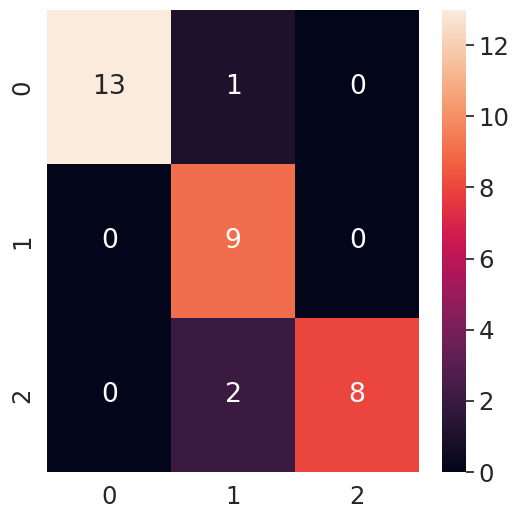

In [25]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


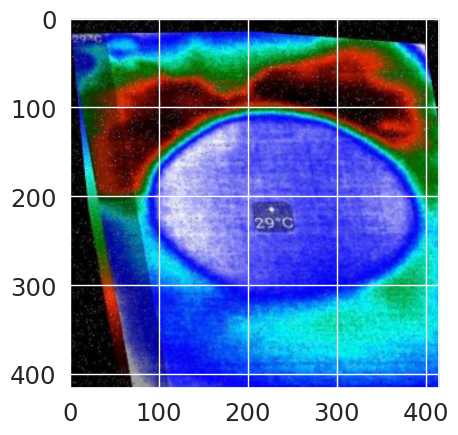

In [32]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/datasets/new--mango--thermal-1/test/Ripened/Mango_1_jpg.rf.46d181ec330dfc6ecf8e83db059d2bf7.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (SIZE, SIZE))

plt.imshow(img)
train_images = []
train_images.append(img)
image=np.array(train_images)


#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(image)
test_features = np.expand_dims(test_features, axis=0)

test_for_RF = np.reshape(test_features, (image.shape[0], -1))


#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back.
test1 = le.inverse_transform(test_prediction)




In [33]:
print(test1)

['Ripened']
